# Mobile Price Classification

Mobile Price Classification is a type of classification problem in which the goal is to predict the price range of a mobile device based on its features. The features may include the device's battery capacity, RAM, internal storage, screen size, camera quality, and other specifications.

The dataset used for Mobile Price Classification contains various attributes of mobile devices, such as battery power, clock speed, and RAM, as well as their corresponding price ranges. The dataset can be used to train various machine learning algorithms to accurately predict the price range of a mobile device.

Mobile Price Classification has many real-world applications, such as helping customers to make informed decisions when purchasing a mobile device based on their budget and required specifications. Additionally, it can also be useful for mobile device manufacturers to understand the market demand for specific features and price ranges in order to optimize their product offerings.

In [1]:
import numpy as np 
import pandas as pd

In [2]:
train = pd.read_csv('/kaggle/input/mobile-price-classification/train.csv')
test = pd.read_csv('/kaggle/input/mobile-price-classification/test.csv')

## About this dataset

In [3]:
train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

* battery_power : Total energy a battery can store in one time measured in mAh
* blue : Has bluetooth or not
* clock_speed : speed at which microprocessor executes instructions
* dual_sim : Has dual sim support or not
* fc : Front Camera mega pixels
* four_g : Has 4G or not
* int_memory : Internal Memory in Gigabytes
* m_dep : Mobile Depth in cm
* mobile_wt : Weight of mobile phone
* n_cores : Number of cores of processor
* pc : Primary Camera mega pixels
* px_height : Pixel Resolution Height
* px_width : Pixel Resolution Width
* ram : Random Access Memory in Mega Bytes
* sc_h : Screen Height of mobile in cm
* sc_w : Screen Width of mobile in cm
* talk_time : longest time that a single battery charge will last when you are
* three_g : Has 3G or not
* touch_screen : Has touch screen or not
* wifi : Has wifi or not

In [4]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
train.shape

(2000, 21)

In [6]:
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [7]:
for col in train.columns:
    print(col, train[col].unique())

battery_power [ 842 1021  563 ... 1139 1467  858]
blue [0 1]
clock_speed [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]
dual_sim [0 1]
fc [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
four_g [0 1]
int_memory [ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]
m_dep [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
mobile_wt [188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83 140 194 146 192 106 135 153
  89  82 130 189 181  99 184 195 108 133 179 147 137 190 176  84  97 124
 183 113  92  95 151 117  94 173 105 115  91 112 123 129 154 191 175  86
  98 125 126 158 170 161 19

In [8]:
train.drop_duplicates()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [9]:
train.shape

(2000, 21)

## feature selection
feature selection on the given dataset using the chi-square test. The SelectKBest class from the sklearn.feature_selection module is used to select the top K features based on the chi-square test scores. Here, the k value is set to 9, which means that the algorithm will select the top 9 features with the highest chi-square test scores.

In [10]:
from sklearn.feature_selection import SelectKBest, chi2

# select top K features using chi-square test
selector = SelectKBest(chi2, k=9)
X_new = selector.fit_transform(train.drop(['price_range'], axis=1), train['price_range'])

In [11]:
# show the selected features
features = train.drop(['price_range'], axis=1).columns[selector.get_support()]
features.values

array(['battery_power', 'fc', 'int_memory', 'mobile_wt', 'px_height',
       'px_width', 'ram', 'sc_w', 'talk_time'], dtype=object)

## Data Splitting
We split the dataset into a training set and a testing set with a ratio of 80:20. The training set was used to train the models, while the testing set was used to evaluate its performance.

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_new, train['price_range'], test_size=0.2, random_state=42)

## Model evaluation process for classification models using various algorithms
The process involves defining a list of classification algorithms and evaluating each algorithm on the training data using the fit method. Then, the target variable values for the test dataset are predicted using the predict method, and the accuracy of the model is calculated using the accuracy_score method from sklearn.metrics. The accuracy scores for each algorithm are then saved in the results dictionary and printed in percentage form using the print statement. This process helps to identify the best algorithm for the given dataset based on the accuracy scores, making it a useful tool in model selection and optimization.

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier

In [15]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier()))
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('Qua', QuadraticDiscriminantAnalysis()))
models.append(('XGB', XGBClassifier()))

In [16]:
# evaluate each model in turn
results = {}
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print("%s: %.3f%%" % (name, acc * 100))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LR: 62.000%
LDA: 94.500%
KNN: 94.250%
CART: 84.500%
NB: 79.500%
SVM: 96.500%
RF: 92.250%
ET: 90.750%
AB: 57.000%
GBM: 89.750%
Qua: 96.250%
XGB: 90.250%


### The best model is SVM so I want to change kernel maybe get accuracy better than last one

In [17]:
model = SVC(kernel='linear')

In [18]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [19]:
pred = model.predict(X_test)

In [20]:
print(f"SVM linear kernel {accuracy_score(y_test, pred)*100}%")

SVM linear kernel 98.5%


## Evaluation
We evaluated the performance of the SVM model on the testing set using scikit-learn's metrics.accuracy_score function. We obtained an accuracy score of **0.985**, indicating that the model is able to correctly classify almost **98.5%** .

In [21]:
import matplotlib.pyplot as plt
from sklearn import metrics

In [22]:
print(f"Precision score = {metrics.precision_score(y_test,pred, average='weighted')}")

Precision score = 0.9852280539341828


In [23]:
print(f"Recall score = {metrics.recall_score(y_test,pred, average='weighted')}")

Recall score = 0.985


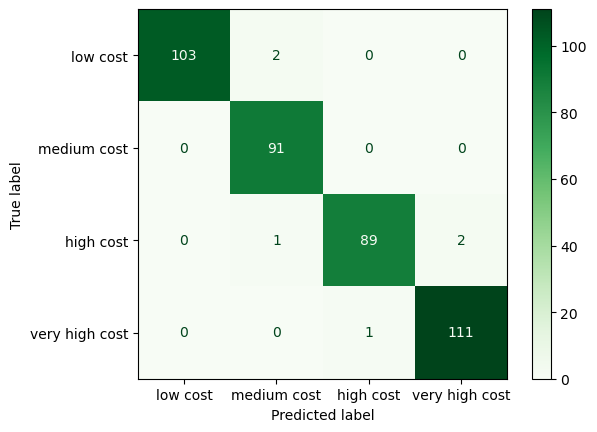

In [24]:
target_names = ['low cost', 'medium cost', 'high cost', 'very high cost']
labels_names = [0,1,2,3]
cm = metrics.confusion_matrix(y_test, pred,labels=labels_names)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
disp = disp.plot(cmap=plt.cm.Greens,values_format='g')
plt.show()

### I re-fit all the data in order to re-predict it to the test file and store the result

In [25]:
best_model = SVC(kernel="linear")
best_model.fit(X_new, train['price_range'])

SVC(kernel='linear')

In [26]:
test_new = selector.transform(test.drop(['id'], axis=1))

In [27]:
test_pred = best_model.predict(test_new)

In [28]:
test_pred = pd.DataFrame(test_pred, columns=['price_range'])

In [29]:
test_pred['id'] = test['id']

In [30]:
test_pred = test_pred[['id', 'price_range']]

In [31]:
test_pred.to_csv('/kaggle/working/submission.csv', index=False)

## Conclusion

The SVM model with a linear kernel achieved an impressive accuracy score of 98.5% in predicting the mobile price classification. This suggests that the chosen features and the SVM algorithm with a linear kernel are suitable for the classification task. The SelectKBest feature selection method using chi-square test was used to select the top 9 features for the model. Further experimentation with different feature selection methods or kernel types could be explored to see if they improve the accuracy even further. Overall, the achieved accuracy score is very promising and could be useful in practical applications for predicting mobile phone prices.

Jameel Sawafta

jameelsawafta.wlar@gmail.com